<h1>Import Pandas</h1>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [4]:
wine = pd.read_csv('diabetes.csv',sep=',')
wine.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = wine[['Glucose', 'DiabetesPedigreeFunction']].values
y = wine['Outcome'].values
standardizer = StandardScaler()
X_scaled = standardizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) 

In [6]:
from sklearn import cluster

cls_wine = cluster.KMeans(n_clusters = 2)
cls_wine = cls_wine.fit(X_train)

C:\Users\incor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\incor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [7]:
print(cls_wine.labels_)

[1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1
 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0
 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0
 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1
 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1
 1 0 0 1 0 0 1 1 1 1 0 1 

In [8]:
print(cls_wine.cluster_centers_)

[[ 0.89878857  0.71755784]
 [-0.46569265 -0.38269678]]


In [18]:
for i in range (1,7):
    knn = KNeighborsClassifier(n_neighbors = 2*i+1, n_jobs = -1).fit(X_train, y_train)
    knn.predict(X_test[10].reshape(1,-1))
    y_pred = knn.predict(X_test)
    print("Accuracy of "+str(2*i+1))
    print(accuracy_score(y_test, y_pred))


Accuracy of 3
0.7402597402597403
Accuracy of 5
0.7467532467532467
Accuracy of 7
0.7662337662337663
Accuracy of 9
0.7597402597402597
Accuracy of 11
0.7532467532467533
Accuracy of 13
0.7467532467532467


<Axes: >

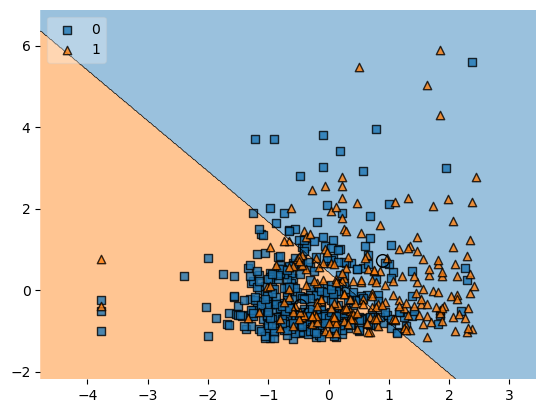

In [10]:
from mlxtend.plotting import plot_decision_regions
#y_train_new = y_train.to_numpy()
plot_decision_regions(X_train,y_train,clf=cls_wine,legend=2,X_highlight=cls_wine.cluster_centers_)

In [11]:
knn.predict(X_test[10].reshape(1,-1))

array([0], dtype=int64)

In [12]:
y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))


0.7207792207792207
